In [1]:
from matplotlib import pyplot, cm
from math import * 
import numpy
#import sympy
#from scipy.optimize import brentq
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 1D Stefan Problem

In [2]:
t = 0.1
alpha1 = 2.06*10**-5
Cp = 2030
Tw = 383.15
Tsat = 373.15
L = 2.26*10**6

In [3]:
(Cp*(Tw-Tsat))/(numpy.sqrt(numpy.pi)*L)

0.0050677205955838292

#Transcedental Equation
#from sympy import init_printing
#init_printing ()

In [4]:
#chi = sympy.symbols('chi')
#chi = (Cp*(Tw-Tsat))/(numpy.sqrt(numpy.pi)*L)*(sympy.erf(chi)*sympy.exp(chi**2))
#chi

In [5]:
chi = 0.0669161

In [6]:
#Temperature distribution theoritically
#T = Tw +((Tsat-Tw)/math.erf(chi))*math.erf(chi/2*(numpy.sqrt(alphav*0.1)))
#T

In [7]:
#Numerical Solution
l = 0.001
nx = 100
dx = l/nx
alpha2 = 0.17*10**-6
dt = (dx**2*0.05)/(max(alpha1,alpha2))
nt = int(t/dt)

In [8]:
#Solving transcedental equation to find out the interface distance

phi = numpy.zeros((nx,1),dtype=float)
T = numpy.zeros((nx,1),dtype=float) 
T[:] = Tsat 

for tstep in range(1,nt):
    XI = 2*chi*(sqrt(alpha1*tstep*dt))
    
    for i in range(0,nx):
        phi[i] = XI - (i*dx)
    
    Told = T.copy()

    for i in range(1,nx-1):
        
        if (phi[i]*phi[i+1] <= 0.):
            Txp = Tsat
            Txm = Told[i-1]
            dxp = abs(phi[i])
            dxm = dx
            Tx = Told[i]
            
            if(dxp/dx<0.01):
                dxp = 2*dx 
                Txp = Told[i+2]
            
        elif (phi[i-1]*phi[i] <= 0.):
            Txp = Told[i+1]
            Txm = Tsat
            dxp = dx
            dxm = abs(phi[i])
            Tx = Told[i]
            
            if(dxm/dx<0.01):
                dxm = 2*dx
                
            
        else:
            Txp = Told[i+1]
            Txm = Told[i-1]
            dxp = dx
            dxm = dx
            Tx = Told[i]
            
        if (phi[i]>=0):
            
            T[i] = Told[i] + alpha1*dt*2*((Txp*dxm+Txm*dxp-Tx*(dxm+dxp))/(dxp*dxm*(dxp+dxm)))
            
        else:
            
            T[i] = Told[i] + alpha2*dt*2*((Txp*dxm+Txm*dxp-Tx*(dxm+dxp))/(dxp*dxm*(dxp+dxm)))
            
            
    #Boundary Conditions
    T[0] = Tw
    T[-1] = Tsat
    
    T_res = sum((T-Told)**2)/nx
    
    print (T_res)
    
    if(tstep == 10):
        T_1 = T.copy()
    if(tstep == 100):
        T_2 = T.copy()
        
    if(tstep == 10000):
        T_3 = T.copy()
           
            

[ 1.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.]
[ 0.

(0.0, 0.00025)

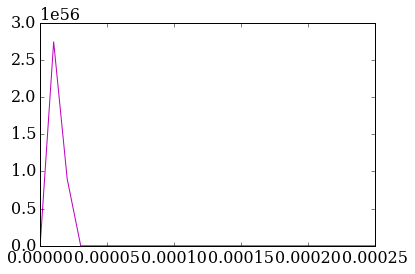

In [9]:
pyplot.plot(numpy.linspace(0,l,nx),T_1,'b')
pyplot.plot(numpy.linspace(0,l,nx),T_2,'r')
pyplot.plot(numpy.linspace(0,l,nx),T_3,'k')
pyplot.plot(numpy.linspace(0,l,nx),T,'m')
pyplot.xlim([0.,0.00025])

In [10]:
#initial conditions

#X = numpy.ones(x)
#Xi = x*dt #interface moving w.r.t time

#Theoritical Interface motion 


XT = (Cp * (Tw - Tsat))/(numpy.sqrt(numpy.pi)*L)

XI = 2 * XT*(numpy.sqrt(alphav*t))
XI

# Theoritical Temperature Distribution
Td = Tw + ((Tsat-T)/XT)*(XT/XI)

NameError: name 'alphav' is not defined